# Loading the important libraries

In [92]:
#used for the preprocessing of the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#used for the modelling purpose
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix ,classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, learning_curve, validation_curve


In [93]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading the dataset

In [94]:
data = pd.read_csv('/content/drive/MyDrive/proj_ana_02/Improved_All_Combined_hr_rsp_binary.csv/Improved_All_Combined_hr_rsp_binary.csv')

In [95]:
data.head() #printing the head of the dataset

,Participant,HR,respr,Time(sec),Label
0,2,118.00,12.127693,1644227583,0
1,2,113.50,12.127693,1644227584,0
2,2,93.00,12.127693,1644227585,0
3,2,93.25,12.127693,1644227586,0
4,2,86.40,12.127693,1644227587,0


In [96]:
data.shape #finding the shape of the dataset

(112516, 5)

In [97]:
data.describe() #finding out the summary of the dataset

,Participant,HR,respr,Time(sec),Label
count,112516.000000,112472.000000,112516.000000,1.125160e+05,112516.000000
mean,18.475470,80.216177,12.465482,1.645692e+09,0.327198
std,9.871133,12.732206,2.030810,8.179419e+05,0.469192
min,2.000000,49.000000,5.204728,1.644228e+09,0.000000
25%,10.000000,71.330000,11.191843,1.644846e+09,0.000000
50%,18.000000,77.890000,12.743635,1.645461e+09,0.000000
75%,27.000000,87.020000,13.877519,1.646648e+09,1.000000
max,35.000000,146.780000,18.163532,1.646842e+09,1.000000


In [98]:
data.info() #printing the info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112516 entries, 0 to 112515
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Participant  112516 non-null  int64  
 1   HR           112472 non-null  float64
 2   respr        112516 non-null  float64
 3   Time(sec)    112516 non-null  int64  
 4   Label        112516 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 4.3 MB


Checking null values in the dataset

In [99]:
data.isnull().sum() #finding out the null values

Participant     0
HR             44
respr           0
Time(sec)       0
Label           0
dtype: int64

In [100]:
data = data.dropna() #dropping the null values from the dataset

In [101]:
data.isnull().sum()

Participant    0
HR             0
respr          0
Time(sec)      0
Label          0
dtype: int64

In [102]:
data['Label'].value_counts() #finding out the labels count in the dataset

0    75657
1    36815
Name: Label, dtype: int64

Doing some Exporatory data analysis on the dataset with the help of visualization.

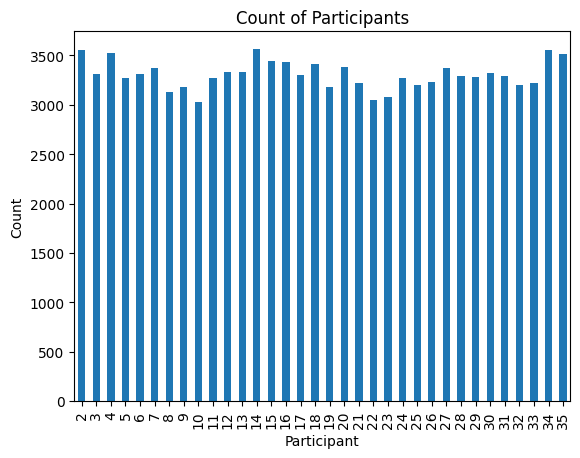

In [103]:
participant_counts = data['Participant'].value_counts().sort_index()
participant_counts.plot.bar()
plt.title('Count of Participants')
plt.xlabel('Participant')
plt.ylabel('Count')
plt.show()

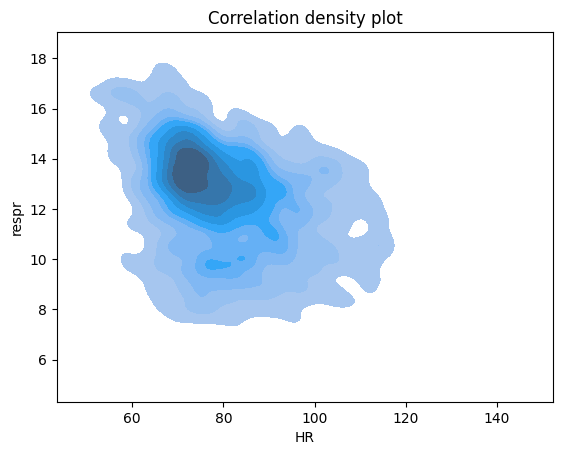

In [104]:
#plotting the density plot along with the correlation in the dataset
sns.kdeplot(data=data, x="HR", y="respr", fill=True)
plt.title('Correlation density plot')
plt.show()

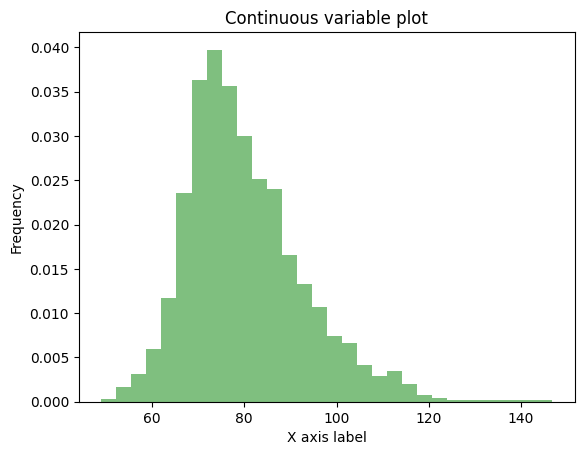

In [105]:
# Plot the data as a histogram
plt.hist(data['HR'], bins=30, density=True, alpha=0.5, color='green')

# Add labels and title
plt.xlabel('X axis label')
plt.ylabel('Frequency')
plt.title('Continuous variable plot')

# Show the plot
plt.show()

Visualizing the distribution of features and checking for the outliers.

<Axes: xlabel='HR'>

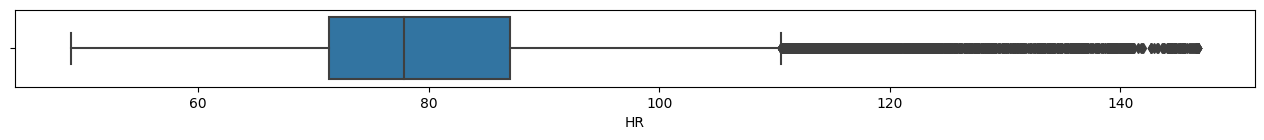

In [106]:
fig, axs = plt.subplots(figsize=(16, 1))
sns.boxplot(x=data['HR'])

<Axes: xlabel='respr'>

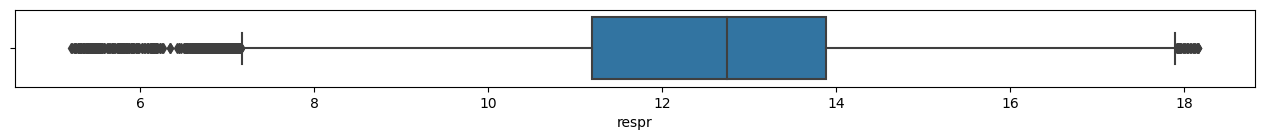

In [107]:
fig, axs = plt.subplots(figsize=(16, 1))
sns.boxplot(x=data['respr'])

# plotting correlation matrix

<Axes: >

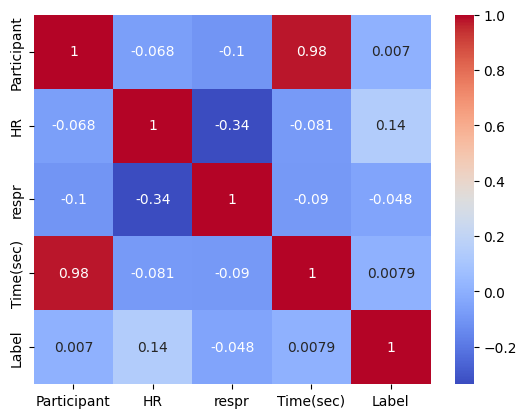

In [108]:
# Compute the correlation matrix
corr = data.corr()

# Plot the correlation matrix using a heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Logisitic Classifier

In [109]:
X= data.drop('Label',axis=1)
y=  data['Label']

In [110]:

# Standardization
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Normalization
normalizer = MinMaxScaler()
X_norm = normalizer.fit_transform(X)

In [111]:
# Split the dataset into 80% training, 10% validation, and 10% testing sets
from sklearn.model_selection import train_test_split

# Split the dataset into 80% training, 10% validation, and 10% testing sets
X_train, X_test_rem, y_train, y_test_rem = train_test_split(X_std, y, train_size=0.8, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test_rem, y_test_rem, test_size=0.5, random_state=42)




In [112]:
data_shape = [X_train, X_test,X_val, y_train, y_test,y_val]

for i in data_shape:
  print(i.shape)

(89977, 4)
(11247, 4)
(11248, 4)
(89977,)
(11247,)
(11248,)


In [113]:
#Create a logistic regression model
lr = LogisticRegression()
#Train the model on the train set
lr.fit(X_train, y_train)

#Predict on the train set
y_train_pred = lr.predict(X_train)

Evaluate the model on the train set

In [114]:
train_accuracy = accuracy_score(y_train, y_train_pred)
train_confusion_matrix = confusion_matrix(y_train, y_train_pred)
train_classfication_report_print = classification_report(y_train, y_train_pred, zero_division=1)

In [115]:
#Predict on the test set
y_test_pred = lr.predict(X_val)

Evaluate the model on the test set

In [116]:
test_accuracy = accuracy_score(y_val, y_test_pred)
test_confusion_matrix = confusion_matrix(y_val, y_test_pred)
test_classfication_report_print = classification_report(y_val, y_test_pred, zero_division=1)

print("Training Accuracy:", train_accuracy)
print("Training Confusion Matrix:\n", train_confusion_matrix)
print("Training Classification Report:\n", train_classfication_report_print)

print("Test Accuracy:", test_accuracy)
print("Test Confusion Matrix:\n", test_confusion_matrix)
print("Test Classification Report:\n", test_classfication_report_print)

Training Accuracy: 0.6741167187170054
Training Confusion Matrix:
 [[59587   926]
 [28396  1068]]
Training Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.98      0.80     60513
           1       0.54      0.04      0.07     29464

    accuracy                           0.67     89977
   macro avg       0.61      0.51      0.44     89977
weighted avg       0.63      0.67      0.56     89977

Test Accuracy: 0.6746977240398293
Test Confusion Matrix:
 [[7467   97]
 [3562  122]]
Test Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.99      0.80      7564
           1       0.56      0.03      0.06      3684

    accuracy                           0.67     11248
   macro avg       0.62      0.51      0.43     11248
weighted avg       0.64      0.67      0.56     11248



# Logistic with focus on Class

In [117]:
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)

# create the logistic regression model with class weights
model = LogisticRegression(class_weight={0: class_weights[0], 1: class_weights[1]})

# train the model on your data
model.fit(X_train, y_train)

# predict on the validation set
y_val_pred = model.predict(X_val)

# predict on the training set
y_train_pred = model.predict(X_train)

# calculate accuracy, confusion matrix, and classification report for validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_confusion_matrix = confusion_matrix(y_val, y_val_pred)
val_classification_report_print = classification_report(y_val, y_val_pred, zero_division=1)

# calculate accuracy, confusion matrix, and classification report for training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_confusion_matrix = confusion_matrix(y_train, y_train_pred)
train_classification_report_print = classification_report(y_train, y_train_pred, zero_division=1)

print("Training Accuracy:", train_accuracy)
print("Training Confusion Matrix:\n", train_confusion_matrix)
print("Training Classification Report:\n", train_classification_report_print)

print("Validation Accuracy:", val_accuracy)
print("Validation Confusion Matrix:\n", val_confusion_matrix)
print("Validation Classification Report:\n", val_classification_report_print)




Training Accuracy: 0.5735354590617602
Training Confusion Matrix:
 [[37228 23285]
 [15087 14377]]
Training Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.62      0.66     60513
           1       0.38      0.49      0.43     29464

    accuracy                           0.57     89977
   macro avg       0.55      0.55      0.54     89977
weighted avg       0.60      0.57      0.58     89977

Validation Accuracy: 0.5769914651493598
Validation Confusion Matrix:
 [[4727 2837]
 [1921 1763]]
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.62      0.67      7564
           1       0.38      0.48      0.43      3684

    accuracy                           0.58     11248
   macro avg       0.55      0.55      0.55     11248
weighted avg       0.60      0.58      0.59     11248



# Random Forest

In [118]:
from sklearn.ensemble import RandomForestClassifier

# assume X_train, y_train are your training data
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train, y_train)

# predict on the training set
y_train_pred = rf.predict(X_train)

# predict on the validation set
y_val_pred = rf.predict(X_val)

# calculate accuracy, confusion matrix, and classification report for validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_confusion_matrix = confusion_matrix(y_val, y_val_pred)
val_classification_report_print = classification_report(y_val, y_val_pred, zero_division=1)

# calculate accuracy, confusion matrix, and classification report for training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_confusion_matrix = confusion_matrix(y_train, y_train_pred)
train_classification_report_print = classification_report(y_train, y_train_pred, zero_division=1)

print("Training Accuracy:", train_accuracy)
print("Training Confusion Matrix:\n", train_confusion_matrix)
print("Training Classification Report:\n", train_classification_report_print)

print("Validation Accuracy:", val_accuracy)
print("Validation Confusion Matrix:\n", val_confusion_matrix)
print("Validation Classification Report:\n", val_classification_report_print)


Training Accuracy: 1.0
Training Confusion Matrix:
 [[60513     0]
 [    0 29464]]
Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     60513
           1       1.00      1.00      1.00     29464

    accuracy                           1.00     89977
   macro avg       1.00      1.00      1.00     89977
weighted avg       1.00      1.00      1.00     89977

Validation Accuracy: 0.9973328591749644
Validation Confusion Matrix:
 [[7553   11]
 [  19 3665]]
Validation Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7564
           1       1.00      0.99      1.00      3684

    accuracy                           1.00     11248
   macro avg       1.00      1.00      1.00     11248
weighted avg       1.00      1.00      1.00     11248



# Gradient Boosting Algorithm

In [119]:
from sklearn.ensemble import GradientBoostingClassifier

# assume X_train, y_train are your training data
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# predict on the training set
y_train_pred = gb.predict(X_train)

# predict on the validation set
y_val_pred = gb.predict(X_val)

# calculate accuracy, confusion matrix, and classification report for validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_confusion_matrix = confusion_matrix(y_val, y_val_pred)
val_classification_report_print = classification_report(y_val, y_val_pred, zero_division=1)

# calculate accuracy, confusion matrix, and classification report for training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_confusion_matrix = confusion_matrix(y_train, y_train_pred)
train_classification_report_print = classification_report(y_train, y_train_pred, zero_division=1)

print("Training Accuracy:", train_accuracy)
print("Training Confusion Matrix:\n", train_confusion_matrix)
print("Training Classification Report:\n", train_classification_report_print)

print("Validation Accuracy:", val_accuracy)
print("Validation Confusion Matrix:\n", val_confusion_matrix)
print("Validation Classification Report:\n", val_classification_report_print)



Training Accuracy: 0.7875568200762417
Training Confusion Matrix:
 [[59825   688]
 [18427 11037]]
Training Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.99      0.86     60513
           1       0.94      0.37      0.54     29464

    accuracy                           0.79     89977
   macro avg       0.85      0.68      0.70     89977
weighted avg       0.82      0.79      0.76     89977

Validation Accuracy: 0.7852062588904695
Validation Confusion Matrix:
 [[7476   88]
 [2328 1356]]
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.99      0.86      7564
           1       0.94      0.37      0.53      3684

    accuracy                           0.79     11248
   macro avg       0.85      0.68      0.69     11248
weighted avg       0.82      0.79      0.75     11248



# Support Vector Machine

In [120]:
from sklearn.svm import SVC

# assume X_train, y_train are your training data
svm = SVC(class_weight='balanced', C=1.0)
svm.fit(X_train, y_train)

# predict on the training set
y_train_pred = svm.predict(X_train)

# predict on the validation set
y_val_pred = svm.predict(X_val)

# calculate accuracy, confusion matrix, and classification report for validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_confusion_matrix = confusion_matrix(y_val, y_val_pred)
val_classification_report_print = classification_report(y_val, y_val_pred, zero_division=1)

# calculate accuracy, confusion matrix, and classification report for training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_confusion_matrix = confusion_matrix(y_train, y_train_pred)
train_classification_report_print = classification_report(y_train, y_train_pred, zero_division=1)

print("Training Accuracy:", train_accuracy)
print("Training Confusion Matrix:\n", train_confusion_matrix)
print("Training Classification Report:\n", train_classification_report_print)

print("Validation Accuracy:", val_accuracy)
print("Validation Confusion Matrix:\n", val_confusion_matrix)
print("Validation Classification Report:\n", val_classification_report_print)


Training Accuracy: 0.6486546561899152
Training Confusion Matrix:
 [[37264 23249]
 [ 8364 21100]]
Training Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.62      0.70     60513
           1       0.48      0.72      0.57     29464

    accuracy                           0.65     89977
   macro avg       0.65      0.67      0.64     89977
weighted avg       0.71      0.65      0.66     89977

Validation Accuracy: 0.6525604551920341
Validation Confusion Matrix:
 [[4710 2854]
 [1054 2630]]
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.62      0.71      7564
           1       0.48      0.71      0.57      3684

    accuracy                           0.65     11248
   macro avg       0.65      0.67      0.64     11248
weighted avg       0.71      0.65      0.66     11248



# K nearest neighbor Classifier

In [121]:
from sklearn.neighbors import KNeighborsClassifier

# assume X_train, y_train are your training data
knn = KNeighborsClassifier(weights='distance')
knn.fit(X_train, y_train)

# predict on the training set
y_train_pred = knn.predict(X_train)

# predict on the validation set
y_val_pred = knn.predict(X_val)

# calculate accuracy, confusion matrix, and classification report for validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_confusion_matrix = confusion_matrix(y_val, y_val_pred)
val_classification_report_print = classification_report(y_val, y_val_pred, zero_division=1)

# calculate accuracy, confusion matrix, and classification report for training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_confusion_matrix = confusion_matrix(y_train, y_train_pred)
train_classification_report_print = classification_report(y_train, y_train_pred, zero_division=1)

print("Training Accuracy:", train_accuracy)
print("Training Confusion Matrix:\n", train_confusion_matrix)
print("Training Classification Report:\n", train_classification_report_print)

print("Validation Accuracy:", val_accuracy)
print("Validation Confusion Matrix:\n", val_confusion_matrix)
print("Validation Classification Report:\n", val_classification_report_print)

Training Accuracy: 1.0
Training Confusion Matrix:
 [[60513     0]
 [    0 29464]]
Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     60513
           1       1.00      1.00      1.00     29464

    accuracy                           1.00     89977
   macro avg       1.00      1.00      1.00     89977
weighted avg       1.00      1.00      1.00     89977

Validation Accuracy: 0.9140291607396871
Validation Confusion Matrix:
 [[7093  471]
 [ 496 3188]]
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94      7564
           1       0.87      0.87      0.87      3684

    accuracy                           0.91     11248
   macro avg       0.90      0.90      0.90     11248
weighted avg       0.91      0.91      0.91     11248



# Scaling the dataset

In [122]:
from sklearn.preprocessing import StandardScaler

# create a StandardScaler object
scaler = StandardScaler()

# fit the scaler to your training data
scaler.fit(X_train)

# transform both the training and testing data using the scaler
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)


# Neural Network

In [123]:
# Import necessary libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

# Define the ANN model
model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu')) # Input layer
model.add(Dense(6, activation='relu')) # Hidden layer
model.add(Dense(1, activation='sigmoid')) # Output layer

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=30)

Epoch 1/50
3000/3000 [==============================] - 6s 2ms/step - loss: 0.6211 - accuracy: 0.6681
Epoch 2/50
3000/3000 [==============================] - 6s 2ms/step - loss: 0.6070 - accuracy: 0.6852
Epoch 3/50
3000/3000 [==============================] - 6s 2ms/step - loss: 0.6008 - accuracy: 0.6906
Epoch 4/50
3000/3000 [==============================] - 5s 2ms/step - loss: 0.5971 - accuracy: 0.6934
Epoch 5/50
3000/3000 [==============================] - 7s 2ms/step - loss: 0.5949 - accuracy: 0.6949
Epoch 6/50
3000/3000 [==============================] - 5s 2ms/step - loss: 0.5936 - accuracy: 0.6943
Epoch 7/50
3000/3000 [==============================] - 6s 2ms/step - loss: 0.5924 - accuracy: 0.6959
Epoch 8/50
3000/3000 [==============================] - 6s 2ms/step - loss: 0.5916 - accuracy: 0.6952
Epoch 9/50
3000/3000 [==============================] - 5s 2ms/step - loss: 0.5905 - accuracy: 0.6945
Epoch 10/50
3000/3000 [==============================] - 7s 2ms/step - loss: 0.589

In [124]:
# import numpy as np

# # predict on the validation set
# y_val_pred = model.predict(X_val)

# # binarize the predictions using a threshold of 0.5
# y_val_pred_binary = np.where(y_val_pred > 0.5, 1, 0)

# # calculate accuracy, confusion matrix, and classification report for validation set
# val_accuracy = accuracy_score(y_val, y_val_pred_binary)
# val_confusion_matrix = confusion_matrix(y_val, y_val_pred_binary)
# val_classification_report_print = classification_report(y_val, y_val_pred_binary, zero_division=1)


352/352 [==============================] - 0s 1ms/step


In [125]:
# Evaluate the model
scores = model.evaluate(X_val_scaled,y_val)
print("Accuracy: %.2f%%" % (scores[1]*100))

# predict on the training set
y_train_pred = model.predict(X_train)

# predict on the validation set
y_val_pred = model.predict(X_val)

# binarize the predictions using a threshold of 0.5
y_val_pred_binary = np.where(y_val_pred > 0.5, 1, 0)

# binarize the predictions using a threshold of 0.5
y_train_pred_binary = np.where(y_train_pred > 0.5, 1, 0)

# calculate accuracy, confusion matrix, and classification report for validation set
val_accuracy = accuracy_score(y_val, y_val_pred_binary)
val_confusion_matrix = confusion_matrix(y_val, y_val_pred_binary)
val_classification_report_print = classification_report(y_val, y_val_pred_binary)

# calculate accuracy, confusion matrix, and classification report for training set
train_accuracy = accuracy_score(y_train, y_train_pred_binary)
train_confusion_matrix = confusion_matrix(y_train, y_train_pred_binary)
train_classification_report_print = classification_report(y_train, y_train_pred_binary)

print("Training Accuracy:", train_accuracy)
print("Training Confusion Matrix:\n", train_confusion_matrix)
print("Training Classification Report:\n", train_classification_report_print)

print("Validation Accuracy:", val_accuracy)
print("Validation Confusion Matrix:\n", val_confusion_matrix)
print("Validation Classification Report:\n", val_classification_report_print)

352/352 [==============================] - 1s 1ms/step - loss: 0.5857 - accuracy: 0.6943
Accuracy: 69.43%
352/352 [==============================] - 0s 1ms/step
Training Accuracy: 0.6975671560509908
Training Confusion Matrix:
 [[58853  1660]
 [25552  3912]]
Training Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.97      0.81     60513
           1       0.70      0.13      0.22     29464

    accuracy                           0.70     89977
   macro avg       0.70      0.55      0.52     89977
weighted avg       0.70      0.70      0.62     89977

Validation Accuracy: 0.6942567567567568
Validation Confusion Matrix:
 [[7341  223]
 [3216  468]]
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.97      0.81      7564
           1       0.68      0.13      0.21      3684

    accuracy                           0.69     11248
   macro avg       0.69      0.5

In [129]:
# Import necessary libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop

# Define the ANN model
model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu')) # Input layer
model.add(Dense(6, activation='relu')) # Hidden layer
model.add(Dense(1, activation='sigmoid')) # Output layer

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=30)

Epoch 1/50
3000/3000 [==============================] - 6s 2ms/step - loss: 0.6327 - accuracy: 0.6672
Epoch 2/50
3000/3000 [==============================] - 7s 2ms/step - loss: 0.6090 - accuracy: 0.6907
Epoch 3/50
3000/3000 [==============================] - 5s 2ms/step - loss: 0.6033 - accuracy: 0.6909
Epoch 4/50
3000/3000 [==============================] - 6s 2ms/step - loss: 0.5998 - accuracy: 0.6943
Epoch 5/50
3000/3000 [==============================] - 6s 2ms/step - loss: 0.5959 - accuracy: 0.6950
Epoch 6/50
3000/3000 [==============================] - 5s 2ms/step - loss: 0.5912 - accuracy: 0.6962
Epoch 7/50
3000/3000 [==============================] - 7s 2ms/step - loss: 0.5873 - accuracy: 0.6987
Epoch 8/50
3000/3000 [==============================] - 6s 2ms/step - loss: 0.5846 - accuracy: 0.7009
Epoch 9/50
3000/3000 [==============================] - 7s 2ms/step - loss: 0.5822 - accuracy: 0.7037
Epoch 10/50
3000/3000 [==============================] - 6s 2ms/step - loss: 0.580

In [130]:
# Evaluate the model
scores = model.evaluate(X_val_scaled,y_val)
print("Accuracy: %.2f%%" % (scores[1]*100))

# predict on the training set
y_train_pred = model.predict(X_train)

# predict on the validation set
y_val_pred = model.predict(X_val)

# binarize the predictions using a threshold of 0.5
y_val_pred_binary = np.where(y_val_pred > 0.5, 1, 0)

# binarize the predictions using a threshold of 0.5
y_train_pred_binary = np.where(y_train_pred > 0.5, 1, 0)

# calculate accuracy, confusion matrix, and classification report for validation set
val_accuracy = accuracy_score(y_val, y_val_pred_binary)
val_confusion_matrix = confusion_matrix(y_val, y_val_pred_binary)
val_classification_report_print = classification_report(y_val, y_val_pred_binary)

# calculate accuracy, confusion matrix, and classification report for training set
train_accuracy = accuracy_score(y_train, y_train_pred_binary)
train_confusion_matrix = confusion_matrix(y_train, y_train_pred_binary)
train_classification_report_print = classification_report(y_train, y_train_pred_binary)

print("Training Accuracy:", train_accuracy)
print("Training Confusion Matrix:\n", train_confusion_matrix)
print("Training Classification Report:\n", train_classification_report_print)

print("Validation Accuracy:", val_accuracy)
print("Validation Confusion Matrix:\n", val_confusion_matrix)
print("Validation Classification Report:\n", val_classification_report_print)

352/352 [==============================] - 1s 2ms/step - loss: 0.5708 - accuracy: 0.7140
Accuracy: 71.40%
352/352 [==============================] - 1s 2ms/step
Training Accuracy: 0.7172499638796581
Training Confusion Matrix:
 [[55522  4991]
 [20450  9014]]
Training Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.92      0.81     60513
           1       0.64      0.31      0.41     29464

    accuracy                           0.72     89977
   macro avg       0.69      0.61      0.61     89977
weighted avg       0.70      0.72      0.68     89977

Validation Accuracy: 0.7141714082503556
Validation Confusion Matrix:
 [[6936  628]
 [2587 1097]]
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.92      0.81      7564
           1       0.64      0.30      0.41      3684

    accuracy                           0.71     11248
   macro avg       0.68      0.6

Using cross validation to find the best optimal model

Cross-validation scores: [0.66832629 0.65752389 0.63817018 0.64875078 0.67818085]
Mean cross-validation score: 0.658


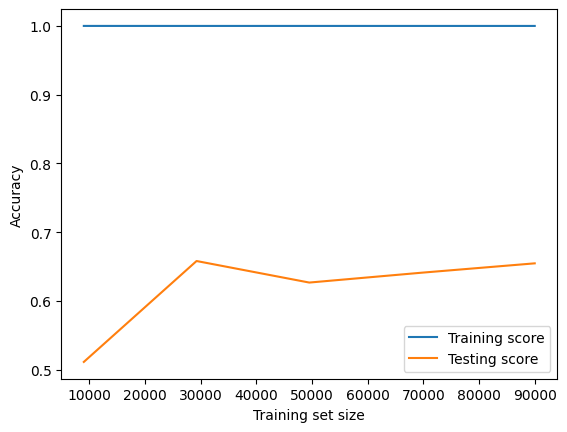

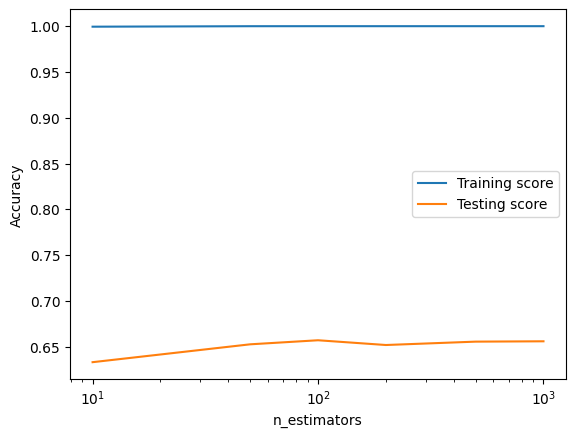

In [128]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, learning_curve, validation_curve

# assume X, y are your data and labels
rf = RandomForestClassifier(class_weight='balanced')

# Cross-validation
cv_scores = cross_val_score(rf, X, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean():.3f}")

# Learning curves
train_sizes, train_scores, test_scores = learning_curve(rf, X, y, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Testing score')
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Validation curves
param_range = [10, 50, 100, 200, 500, 1000]
train_scores, test_scores = validation_curve(
    rf, X, y, param_name='n_estimators', param_range=param_range, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.plot(param_range, train_scores_mean, label='Training score')
plt.plot(param_range, test_scores_mean, label='Testing score')
plt.xscale('log')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Using smoting 

In [133]:
# assume 'X' is the feature matrix and 'y' is the target variable
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

# split the resampled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# build the random forest classifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the model on training data
rf_model.fit(X_train, y_train)

# predict on training and test data
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# calculate accuracy scores
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("Training accuracy:", train_acc)
print("Test accuracy:", test_acc)

# Print the classification report on the test set
report = classification_report(y_train, y_train_pred)
print(report)
report_2 = classification_report(y_test,y_test_pred)
print(report_2)



Training accuracy: 0.9999669560763645
Test accuracy: 0.9938208373261078
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     60482
           1       1.00      1.00      1.00     60569

    accuracy                           1.00    121051
   macro avg       1.00      1.00      1.00    121051
weighted avg       1.00      1.00      1.00    121051

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     15175
           1       0.99      1.00      0.99     15088

    accuracy                           0.99     30263
   macro avg       0.99      0.99      0.99     30263
weighted avg       0.99      0.99      0.99     30263

